<a href="https://colab.research.google.com/github/Rkl2023/2023.10.18/blob/main/IC_interview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.3 MB/s eta 0:00:00


In [69]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [64]:
# Load the dataset
data = pd.read_excel('/content/Database.xlsx')
data
# Clean the dataframe by removing unnecessary columns and renaming the headers
data.columns = ['Index', 'A', 'B', 'C', 'D', 'Y']
data = data.drop('Index', axis=1)
data = data.drop(0)  # Drop the first row as it is not data
data

,A,B,C,D,Y
1,-0.139992,0.200698,-0.017494,0.062906,0.226283
2,0.392447,0.027701,0.08664,0.045167,0.236853
3,-0.295274,0.122772,0.061396,0.012898,0.226437
4,0.583471,0.115951,0.061956,0.056013,0.255699
5,0.868948,0.074802,0.086895,0.056982,0.289224
...,...,...,...,...,...
1996,-0.311273,0.370487,0.003156,-0.018738,0.24715
1997,0.441871,0.18504,0.058355,0.039964,0.246822
1998,0.210502,0.188492,0.091979,0.019114,0.236684
1999,0.065654,0.265034,0.066641,-0.002982,0.236231


In [93]:
# Convert the data to numeric
data = data.apply(pd.to_numeric)

# Separate the features and the target variable
X = data[['A', 'B', 'C', 'D']]
y = data['Y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a RandomForestRegressor model with random_state for reproducibility
model = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [5,None],
    'min_samples_split': [2, 10]
}

# Perform GridSearchCV to find the best hyperparameters with parallel processing
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Use the best model found by GridSearchCV
best_model = grid_search.best_estimator_

# Train the best model on the training data
best_model.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred = best_model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Examine the best parameters chosen by GridSearchCV
print(f'Best parameters found: {grid_search.best_params_}')

Mean Squared Error: 6.520167983456049e-06
R-squared: 0.9927911938841608
Best parameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


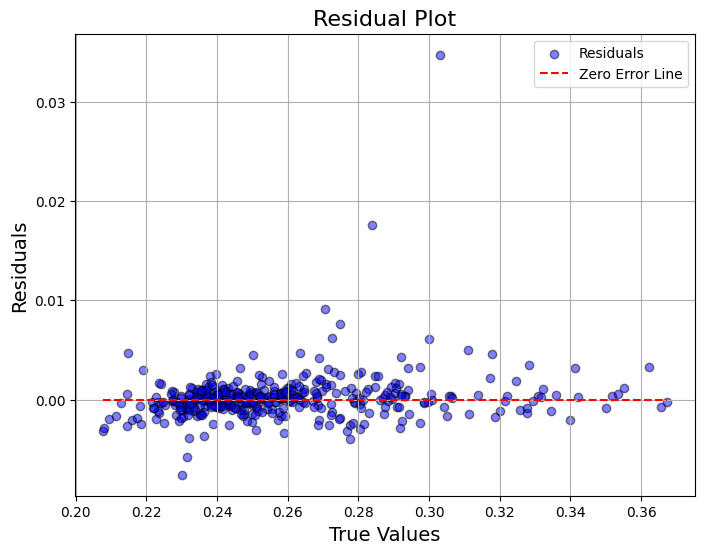

In [97]:
# Residual Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test - y_pred, alpha=0.5, label='Residuals', color='blue', edgecolors='k')
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max(), colors='r', linestyles='dashed', label='Zero Error Line')
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot', fontsize=16)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


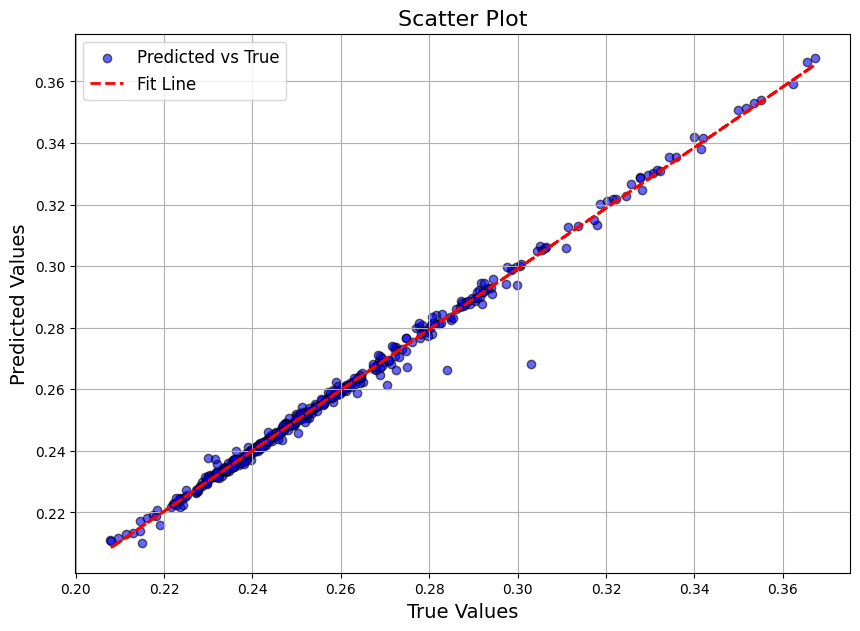

In [98]:
# Plot scatter plot of true values vs predicted values
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolors='k', label='Predicted vs True')

# Add fit line
z = np.polyfit(y_test, y_pred, 1)  # Fit a polynomial of degree 1 (linear fit)
p = np.poly1d(z)  # Generate the polynomial function
plt.plot(y_test, p(y_test), color='red', linestyle='--', linewidth=2, label='Fit Line')

# Add chart labels and title
plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Scatter Plot', fontsize=16)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)
plt.show()

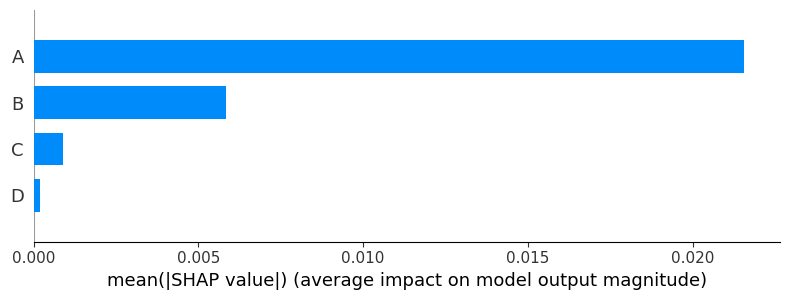

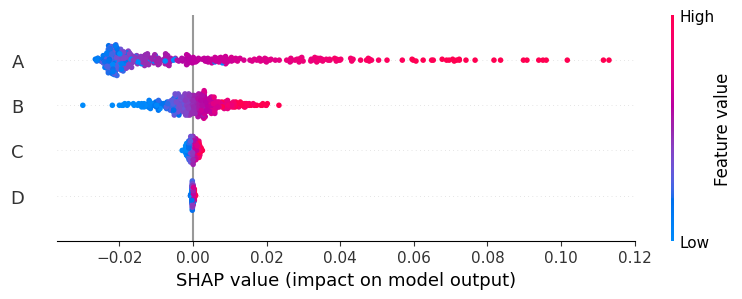

In [100]:
# Use SHAP for sensitivity analysis
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_scaled)

# Ensure feature_names is correctly defined
feature_names = ['A', 'B', 'C', 'D']

# Draw a summary plot of SHAP values (bar plot)
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names, plot_type="bar")

# Draw the impact of each feature on the target variable
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)

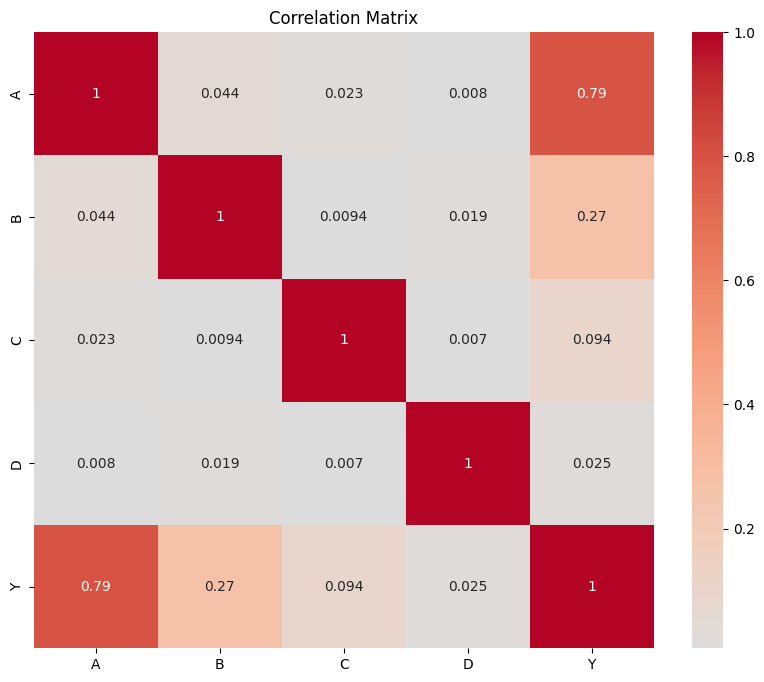

In [81]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()